In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('movies.csv')
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [5]:
print("MISING VALUES")
for col in df.columns:
    m_values=df[col].isna().sum()
    percentage = (m_values / len(df)) * 100
    print(f"{col:<10} | %{percentage:>6.2f} | ({m_values} values)")

MISING VALUES
MOVIES     | %  0.00 | (0 values)
YEAR       | %  6.44 | (644 values)
GENRE      | %  0.80 | (80 values)
RATING     | % 18.20 | (1820 values)
ONE-LINE   | %  0.00 | (0 values)
STARS      | %  0.00 | (0 values)
VOTES      | % 18.20 | (1820 values)
RunTime    | % 29.58 | (2958 values)
Gross      | % 95.40 | (9539 values)


In [58]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
columns_to_clean = ["GENRE", "ONE-LINE", "STARS"]
for col in columns_to_clean:
  df[col]= df[col].str.strip()
print(df[['GENRE', "ONE-LINE", 'STARS']].head())

                          GENRE  \
0      Action, Horror, Thriller   
1  Animation, Action, Adventure   
2       Drama, Horror, Thriller   
3  Animation, Adventure, Comedy   
4         Action, Crime, Horror   

                                            ONE-LINE  \
0  A woman with a mysterious illness is forced in...   
1  The war for Eternia begins again in what may b...   
2  Sheriff Deputy Rick Grimes wakes up from a com...   
3  An animated series that follows the exploits o...   
4  A prequel, set before the events of Army of th...   

                                               STARS  
0  Director:\nPeter Thorwarth\n| \n    Stars:\nPe...  
1  Stars:\nChris Wood, \nSarah Michelle Gellar, \...  
2  Stars:\nAndrew Lincoln, \nNorman Reedus, \nMel...  
3  Stars:\nJustin Roiland, \nChris Parnell, \nSpe...  
4  Director:\nMatthias Schweighöfer\n| \n    Star...  


In [10]:
temp_split = df['STARS'].str.split('|', expand=True)
df["DIRECTOR"]= temp_split[0].str.replace('Director:', '', case=False)
df["DIRECTOR"] = df["DIRECTOR"].where(temp_split[0].str.contains('Director:', case=False, na=False))
df["STARS"] = temp_split[1].fillna(temp_split[0]).str.replace('Stars:', '', case=False).str.replace('Director:.*', '', case=True)
df["STARS"]= temp_split[1].str.replace('Stars:', '', case=False).fillna(temp_split[0])
df['DIRECTOR'] = df['DIRECTOR'].str.replace('\n', '').str.strip()
df['STARS'] = df['STARS'].str.replace('\n', '').str.strip()
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,DIRECTOR
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...","21,062",121.0,NaN,Peter Thorwarth
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,NaN,NaN
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...","Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",NaN,NaN,NaN,Matthias Schweighöfer


In [11]:
df["VOTES"]= df["VOTES"].str.replace(",","")
df["VOTES"]=pd.to_numeric(df["VOTES"], errors="coerce")
df["VOTES"]

,VOTES
0,21062.0
1,17870.0
2,885805.0
3,414849.0
4,NaN
...,...
9993,NaN
9995,NaN
9996,NaN
9997,NaN


In [12]:
df["VOTES"].isnull().sum()

np.int64(1400)

In [13]:
df["VOTES"]= df["VOTES"].fillna(0)
df["VOTES"]

,VOTES
0,21062.0
1,17870.0
2,885805.0
3,414849.0
4,0.0
...,...
9993,0.0
9995,0.0
9996,0.0
9997,0.0


In [14]:
df["VOTES"].isnull().sum()

np.int64(0)

In [15]:
df['YEAR'] = df['YEAR'].astype(str)
df['YEAR'] = df['YEAR'].str.extract(r'((?:19|20)\d{2})')
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y', errors='coerce').dt.year.astype('Int64')
df['YEAR']

,YEAR
0,2021
1,2021
2,2010
3,2013
4,2021
...,...
9993,2022
9995,2021
9996,2022
9997,2021


In [16]:
df["YEAR"].isnull().sum()

np.int64(635)

In [17]:
df=df.sort_values(by="YEAR").reset_index(drop=True)
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,DIRECTOR
0,Söderkåkar,1932,Comedy,5.3,The movie version of Gideon Wahlbergs comedy a...,"Gideon Wahlberg, Dagmar Ebbesen, Björn Berglun...",59.0,87.0,NaN,Weyler Hildebrand
1,Scarface,1932,"Action, Crime, Drama",7.8,An ambitious and nearly insane violent gangste...,"Paul Muni, Ann Dvorak, Karen Morley, Osgood Pe...",26365.0,93.0,NaN,NaN
2,Kära släkten,1933,Comedy,5.4,The story about a Stockholm wholesaler and his...,"Gösta Ekman, Tutta Rolf, Carl Barcklind, Thor ...",36.0,94.0,NaN,Gustaf Molander
3,Karriär,1938,Drama,5.2,A traveling theater company in Sweden. Conflic...,"Signe Hasso, Sture Lagerwall, Tollie Zellman, ...",52.0,106.0,NaN,Schamyl Bauman
4,Dumbo,1941,"Animation, Adventure, Drama",7.2,"Ridiculed because of his enormous ears, a youn...","Sterling Holloway, Edward Brophy, Herman Bing,...",124409.0,64.0,$1.60M,NaN


In [18]:
df['YEAR']=df['YEAR'].ffill()
df['YEAR']

,YEAR
0,1932
1,1932
2,1933
3,1938
4,1941
...,...
9563,2023
9564,2023
9565,2023
9566,2023


In [19]:
df["YEAR"].isnull().sum()

np.int64(0)

In [20]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,DIRECTOR
0,Söderkåkar,1932,Comedy,5.3,The movie version of Gideon Wahlbergs comedy a...,"Gideon Wahlberg, Dagmar Ebbesen, Björn Berglun...",59.0,87.0,NaN,Weyler Hildebrand
1,Scarface,1932,"Action, Crime, Drama",7.8,An ambitious and nearly insane violent gangste...,"Paul Muni, Ann Dvorak, Karen Morley, Osgood Pe...",26365.0,93.0,NaN,NaN
2,Kära släkten,1933,Comedy,5.4,The story about a Stockholm wholesaler and his...,"Gösta Ekman, Tutta Rolf, Carl Barcklind, Thor ...",36.0,94.0,NaN,Gustaf Molander
3,Karriär,1938,Drama,5.2,A traveling theater company in Sweden. Conflic...,"Signe Hasso, Sture Lagerwall, Tollie Zellman, ...",52.0,106.0,NaN,Schamyl Bauman
4,Dumbo,1941,"Animation, Adventure, Drama",7.2,"Ridiculed because of his enormous ears, a youn...","Sterling Holloway, Edward Brophy, Herman Bing,...",124409.0,64.0,$1.60M,NaN


In [21]:
df["RunTime"].isnull().sum()

np.int64(2560)

In [22]:
df["RunTime"]= df["RunTime"].fillna(df["RunTime"].mean())
df["RunTime"]

,RunTime
0,87.000000
1,93.000000
2,94.000000
3,106.000000
4,64.000000
...,...
9563,68.874144
9564,68.874144
9565,68.874144
9566,68.874144


In [23]:
df.dropna(subset=['RATING'], inplace=True)
df["RATING"].isnull().sum()

np.int64(0)

In [24]:
df["RunTime"]=df["RunTime"].fillna(df["RunTime"].mean())
df["RunTime"]

,RunTime
0,87.0
1,93.0
2,94.0
3,106.0
4,64.0
...,...
8811,53.0
8812,173.0
8815,113.0
8820,93.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8168 entries, 0 to 8822
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    8168 non-null   object 
 1   YEAR      8168 non-null   Int64  
 2   GENRE     8157 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  8168 non-null   object 
 5   STARS     8168 non-null   object 
 6   VOTES     8168 non-null   float64
 7   RunTime   8168 non-null   float64
 8   Gross     460 non-null    object 
 9   DIRECTOR  4668 non-null   object 
dtypes: Int64(1), float64(3), object(6)
memory usage: 709.9+ KB


In [26]:
df.describe()

,YEAR,RATING,VOTES,RunTime
count,8168.0,8168.000000,8.168000e+03,8168.000000
mean,2015.832762,6.919699,1.514441e+04,69.358358
std,7.569987,1.219970,7.009954e+04,43.280070
min,1932.0,1.100000,5.000000e+00,1.000000
25%,2015.0,6.200000,1.670000e+02,42.000000
50%,2018.0,7.100000,7.925000e+02,68.874144
75%,2020.0,7.800000,3.780750e+03,90.000000
max,2021.0,9.900000,1.713028e+06,853.000000


In [27]:
df['Gross'] = df['Gross'].str.replace('$', '').str.replace('M', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')


In [28]:
df['Gross'].isnull().sum()

np.int64(7708)

In [29]:
df.drop('Gross', axis=1, inplace=True)

**VISUALIZATION**


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df.to_csv('cleaned_movies.csv', index=False)

In [32]:
df_clean=pd.read_csv("cleaned_movies.csv")
df_clean

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,DIRECTOR
0,Söderkåkar,1932,Comedy,5.3,The movie version of Gideon Wahlbergs comedy a...,"Gideon Wahlberg, Dagmar Ebbesen, Björn Berglun...",59.0,87.0,Weyler Hildebrand
1,Scarface,1932,"Action, Crime, Drama",7.8,An ambitious and nearly insane violent gangste...,"Paul Muni, Ann Dvorak, Karen Morley, Osgood Pe...",26365.0,93.0,NaN
2,Kära släkten,1933,Comedy,5.4,The story about a Stockholm wholesaler and his...,"Gösta Ekman, Tutta Rolf, Carl Barcklind, Thor ...",36.0,94.0,Gustaf Molander
3,Karriär,1938,Drama,5.2,A traveling theater company in Sweden. Conflic...,"Signe Hasso, Sture Lagerwall, Tollie Zellman, ...",52.0,106.0,Schamyl Bauman
4,Dumbo,1941,"Animation, Adventure, Drama",7.2,"Ridiculed because of his enormous ears, a youn...","Sterling Holloway, Edward Brophy, Herman Bing,...",124409.0,64.0,NaN
...,...,...,...,...,...,...,...,...,...
8163,The Minimalists: Less Is Now,2021,Documentary,5.9,The Minimalists have reworked this phrase to c...,"Joshua Fields Millburn, Ryan Nicodemus, Dave R...",3415.0,53.0,Matt D'Avella
8164,Headspace: Guide to Meditation,2021,"Documentary, Animation",8.5,"Over the course of eight animated episodes, An...",Star:Andy Puddicombe,1259.0,173.0,NaN
8165,Sen Hiç Atesböcegi Gördün mü?,2021,"Comedy, Drama",6.2,"Rebellious, irreverent wunderkind Gülseren nav...","Ecem Erkek, Devrim Yakut, Engin Alkan, Merve D...",4193.0,113.0,Andaç Haznedaroglu
8166,Trippin' with the Kandasamys,2021,"Comedy, Romance",5.1,"To rekindle their marriages, best friends-turn...","Mariam Bassa, Rushil Juglall, Vashir Kemraj, A...",292.0,93.0,Jayan Moodley


In [33]:
top10=df.sort_values(by="RATING", ascending=False).head(10)
top10[["MOVIES","YEAR","RATING"]]

,MOVIES,YEAR,RATING
462,Avatar: The Last Airbender,2005,9.9
1640,BoJack Horseman,2014,9.9
461,Avatar: The Last Airbender,2005,9.8
644,Dexter,2006,9.8
4147,She-Ra and the Princesses of Power,2018,9.7
3565,Dark,2017,9.7
7702,The Midnight Gospel,2020,9.7
4161,She-Ra and the Princesses of Power,2018,9.7
392,Avatar: The Last Airbender,2005,9.7
3580,Dark,2017,9.6


/tmp/ipython-input-87718723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data=top10, y="MOVIES", x="RATING", palette="pastel")


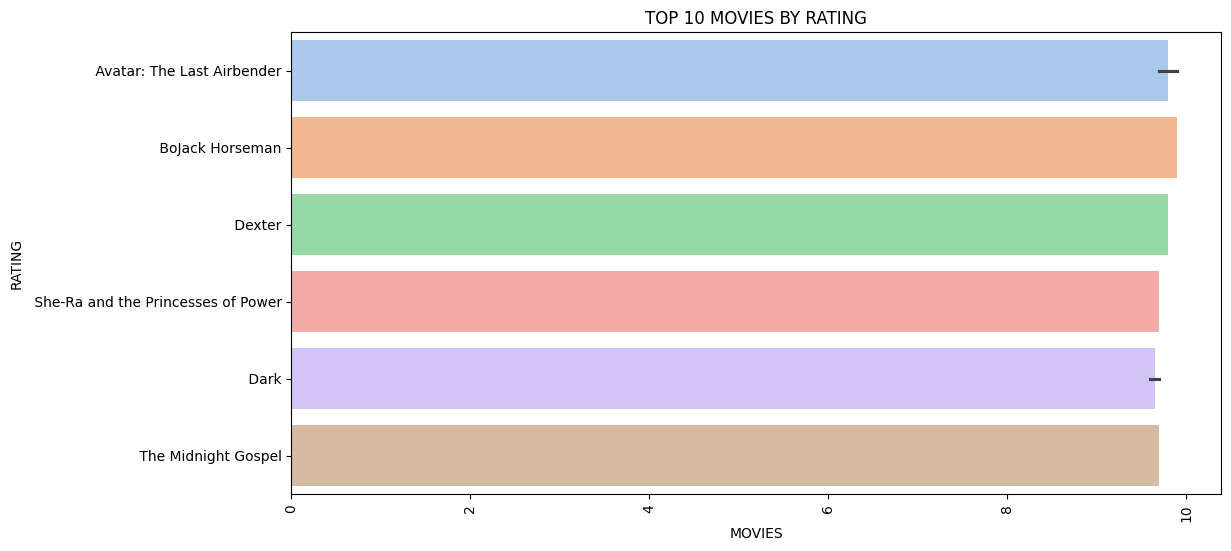

In [34]:
plt.figure(figsize=(12,6))
ax= sns.barplot(data=top10, y="MOVIES", x="RATING", palette="pastel")
plt.title("TOP 10 MOVIES BY RATING")
plt.xlabel("MOVIES")
plt.ylabel("RATING")
plt.xticks(rotation=90)
plt.show()

In [35]:
top_directors = df['DIRECTOR'].value_counts().head(10)
top_directors

,count
DIRECTOR,
Oliver Driver,21
Brian Smith,21
Giancarlo Volpe,19
Jay Karas,16
Baran bo Odar,15
Mustafa Kazan,15
Marcus Raboy,15
Tae You Chang,15
Jay Chapman,14


/tmp/ipython-input-2378104327.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors_df, x='FILM_COUNT', y='DIRECTOR', palette='crest')


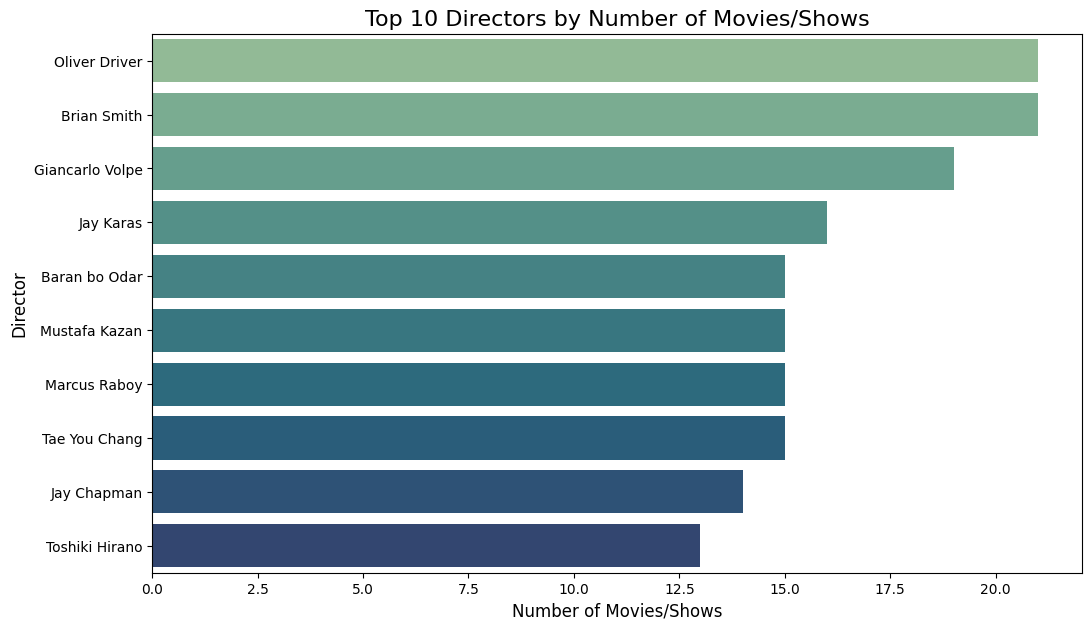

In [36]:
top_directors = df['DIRECTOR'].value_counts().head(10)
top_directors_df = top_directors.reset_index()
top_directors_df.columns = ['DIRECTOR', 'FILM_COUNT']

plt.figure(figsize=(12, 7))
sns.barplot(data=top_directors_df, x='FILM_COUNT', y='DIRECTOR', palette='crest')
plt.title("Top 10 Directors by Number of Movies/Shows", fontsize=16)
plt.xlabel("Number of Movies/Shows", fontsize=12)
plt.ylabel("Director", fontsize=12)
plt.show()

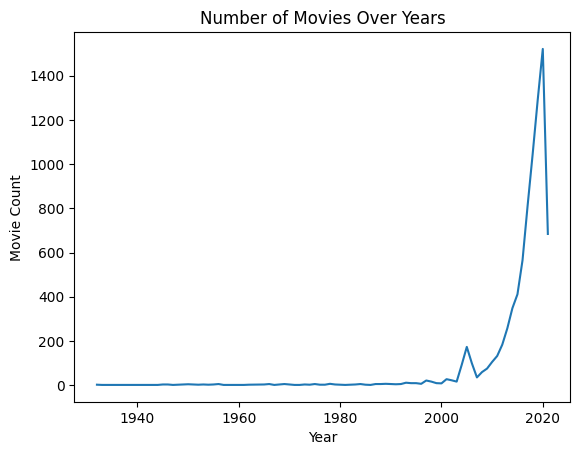

In [37]:
df_clean['YEAR'].value_counts().sort_index().plot(kind='line', title='Number of Movies Over Years')
plt.ylabel("Movie Count")
plt.xlabel("Year")
plt.show()

In [38]:
all_genres= df["GENRE"].str.split(",").explode().str.strip()
top_genres = all_genres.value_counts().head(10)
top_genres

,count
GENRE,
Drama,3499
Comedy,2419
Action,1843
Animation,1403
Crime,1376
Adventure,1335
Documentary,1136
Thriller,777
Romance,763


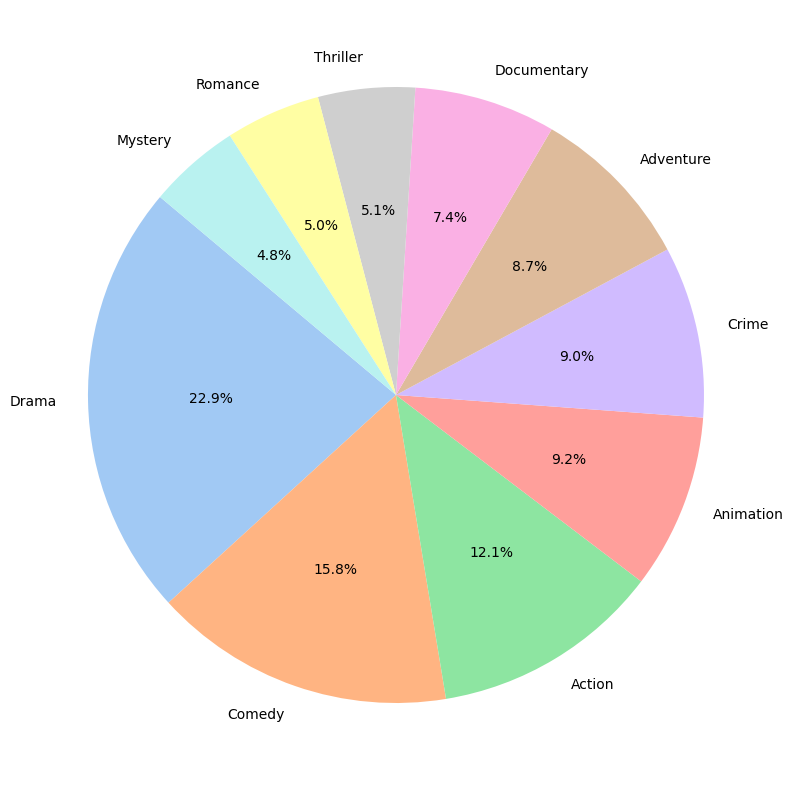

In [39]:
plt.figure(figsize=(10, 10))
plt.pie(top_genres, labels=top_genres.index, autopct='%.1f%%', startangle=140, colors=sns.color_palette('pastel', n_colors=10))
plt.show()

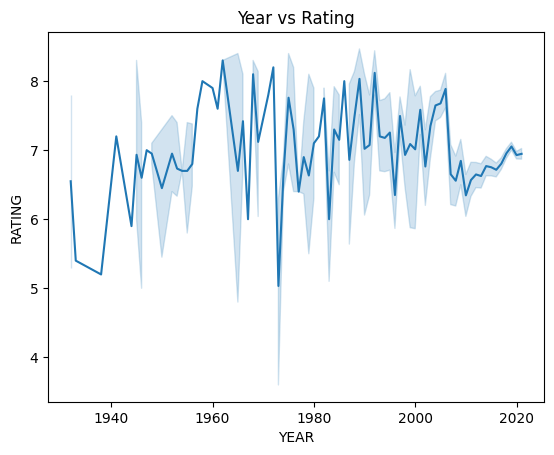

In [40]:
sns.lineplot(data=df_clean, x='YEAR', y='RATING')
plt.title("Year vs Rating")
plt.show()

In [41]:
num_cols = df_clean.select_dtypes(include='number').columns
num_cols

Index(['YEAR', 'RATING', 'VOTES', 'RunTime'], dtype='object')

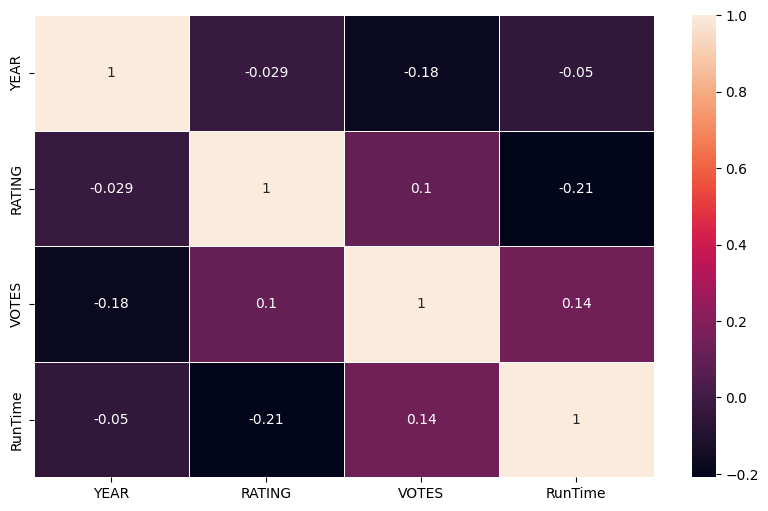

In [42]:
corr = df_clean[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True,linewidths=.5)
plt.show()

**MACHINE LEARNING**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
genres = df['GENRE'].str.get_dummies(sep=', ')
df_ml = pd.concat([df, genres], axis=1)
df_ml.drop('GENRE', axis=1, inplace=True)

In [45]:
y = df_ml['RATING']
X = df_ml.drop(['MOVIES', 'RATING', 'YEAR', 'ONE-LINE', 'STARS', 'DIRECTOR'], axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MEAN SQUARED ERROR (MSE): {mse:.2f}")
print(f"R2: {r2:.2f}")

MEAN SQUARED ERROR (MSE): 1.22
R2: 0.21


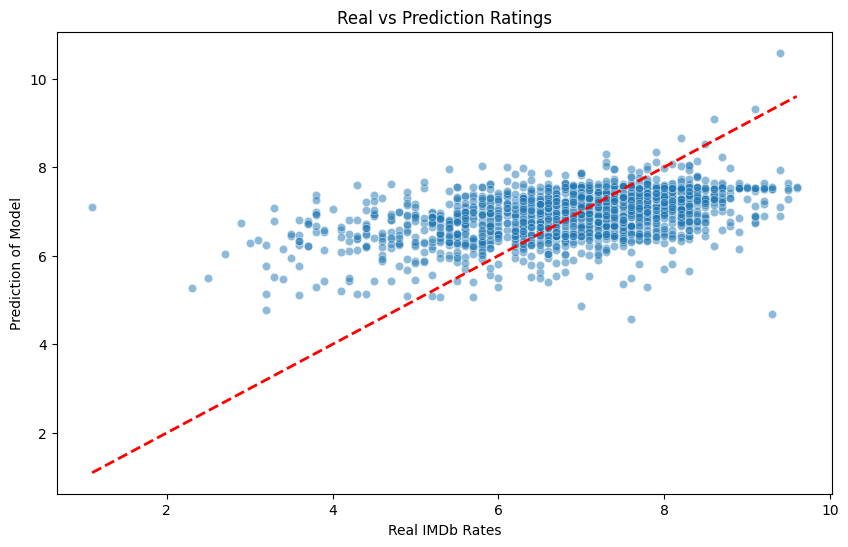

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Real IMDb Rates")
plt.ylabel("Prediction of Model")
plt.title("Real vs Prediction Ratings")
plt.show()